IMPORT LIBRARIES

In [ ]:
# Chunk 1: Mount Drive & Import Libraries
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DEFINE DATASET PATH

In [ ]:
# Chunk 2: Dataset directories
base_dir = "/content/drive/MyDrive/cats vs dogs/cats_vs_dogs_small"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")


DATA PROCESSING AND AUGMENTATION

In [ ]:
# Chunk 3: Data Augmentation & Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)


Found 2001 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


PART 1 -MODEL FROM SCRATCH

In [ ]:
# Chunk 4: CNN from scratch
model_scratch = keras.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_scratch.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

model_scratch.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

TRAIN MODEL FROM SCRATCH

In [ ]:
# Chunk 5: Train Scratch Model
history_scratch = model_scratch.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 745s 12s/step - accuracy: 0.4807 - loss: 0.7304 - val_accuracy: 0.5005 - val_loss: 0.6978
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5285 - loss: 0.6936 - val_accuracy: 0.5964 - val_loss: 0.6904
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5074 - loss: 0.6927 - val_accuracy: 0.4985 - val_loss: 0.6921
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5310 - loss: 0.6943 - val_accuracy: 0.5055 - val_loss: 0.6928
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.5121 - loss: 0.6929 - val_accuracy: 0.5225 - val_loss: 0.6897
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5497 - loss: 0.6915 - val_accuracy: 0.4985 - val_loss: 0.6927
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5323 - loss: 0.6918 - val_accuracy: 0.5165 - val_loss: 0.6880
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5297 - loss: 0.6871 - val_accuracy: 0.5065 - 

PLOT SCRATCH MODEL RESULTS

In [ ]:
# Chunk 6: Accuracy Plot (Scratch)
acc = history_scratch.history['accuracy']
val_acc = history_scratch.history['val_accuracy']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.legend()
plt.title('Scratch Model Accuracy')
plt.show()


PART 2 - TRANSFER LEARNING VGG16

LOAD PRETRAINED VGG16 MODEL

In [ ]:
# Chunk 7: Load Pretrained VGG16 Base
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the convolutional base
conv_base = VGG16(
    weights='imagenet',        # Use pretrained ImageNet weights
    include_top=False,         # Exclude the dense layers at the top
    input_shape=(150, 150, 3)  # Match our input size
)

# Freeze convolutional base so pretrained weights don't change
conv_base.trainable = False
print("✅ VGG16 base loaded and frozen.")


✅ VGG16 base loaded and frozen.


ADD CLASSIFIER ON TOP

In [ ]:
# Chunk 8: Build the full model with custom classifier on top
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

model_pretrained = models.Sequential([
    conv_base,                          # Pretrained base
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_pretrained.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

model_pretrained.summary()
print("✅ Pretrained model built and compiled successfully.")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

✅ Pretrained model built and compiled successfully.


TRAIN PRETRAINED MODEL

In [34]:
# Chunk 9: Train Transfer Learning Model
history_pretrained = model_pretrained.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7782 - loss: 0.4641

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 723s 12s/step - accuracy: 0.7783 - loss: 0.4638 - val_accuracy: 0.8731 - val_loss: 0.3158
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 746s 12s/step - accuracy: 0.7983 - loss: 0.4220 - val_accuracy: 0.8891 - val_loss: 0.2768
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 741s 12s/step - accuracy: 0.8111 - loss: 0.4042 - val_accuracy: 0.8941 - val_loss: 0.2654
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 743s 12s/step - accuracy: 0.8292 - loss: 0.3915 - val_accuracy: 0.8861 - val_loss: 0.2644
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 724s 12s/step - accuracy: 0.8241 - loss: 0.3859 - val_accuracy: 0.8791 - val_loss: 0.2921
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 723s 12s/step - accuracy: 0.8203 - loss: 0.3735 - val_accuracy: 0.8921 - val_loss: 0.2555
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 741s 12s/step - accuracy: 0.8495 - loss: 0.3504 - val_accuracy: 0.8911 - val_loss: 0.2647
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 717s 11s/step - accuracy: 0.8452 - loss: 0.3493 - val_accuracy: 0.8911 - val_

PLOT PRETRAINED RESULTS

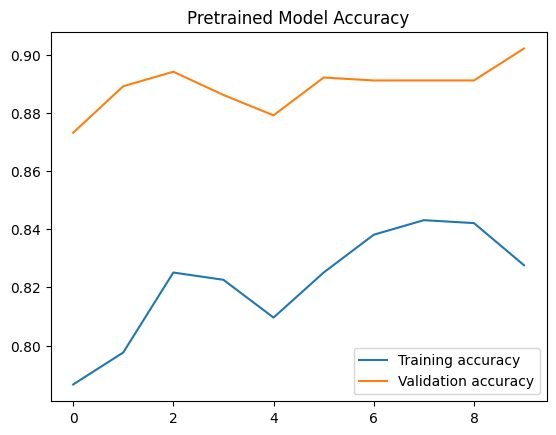

In [35]:
# Chunk 10: Accuracy Plot (Pretrained)
acc = history_pretrained.history['accuracy']
val_acc = history_pretrained.history['val_accuracy']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.legend()
plt.title('Pretrained Model Accuracy')
plt.show()


FINAL EVALUATION ON TEST SET

In [36]:
# Chunk 11: Model Evaluation
test_loss_scratch, test_acc_scratch = model_scratch.evaluate(test_generator)
test_loss_pretrained, test_acc_pretrained = model_pretrained.evaluate(test_generator)

print("Test Accuracy — Scratch Model:", test_acc_scratch)
print("Test Accuracy — Pretrained Model:", test_acc_pretrained)


32/32 ━━━━━━━━━━━━━━━━━━━━ 243s 8s/step - accuracy: 0.5232 - loss: 0.6961
32/32 ━━━━━━━━━━━━━━━━━━━━ 237s 7s/step - accuracy: 0.8984 - loss: 0.2468
Test Accuracy — Scratch Model: 0.5
Test Accuracy — Pretrained Model: 0.8889999985694885
